## US Adult Income
**Dataset of adult income** <br></br>
*DataSet Overveiw*

- Each row is labelled as either having a salary greater than **">50K" or "<=50K"**.
- This Data set is split into two CSV files, named adult-training.csv and adult-test.csv. <br></br>
**To Build a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.**
- **categorical_columns = [workclass, education, marital_status, occupation, relationship, race, gender, native_country]**
- **continuous_columns = [age, education_num, capital_gain, capital_loss, hours_per_week]**
- **A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))**

Prediction task is to determine whether a person makes over 50K a year. 
- Dataset Source: https://archive.ics.uci.edu/ml/datasets/census+income, http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_file = "/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-training.csv"
test_file = "/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-test.csv"

columns = ['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'Hours/Week','Native_country','Income']

In [33]:
train = pd.read_csv(train_file, names=columns)
train.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education_num     32561 non-null int64
Marital_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native_country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
train.shape

(32561, 15)

In [35]:
train.describe()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
# Replacing '?' with nan 
train.replace(' ?', np.nan, inplace=True)

In [40]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education_num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours/Week           0
Native_country     583
Income               0
dtype: int64

#### Missing Data:
Workclass(1836), Occupation(1843), Native_country(583) <br></br>
All belongs to Categorical data

In [44]:
train['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

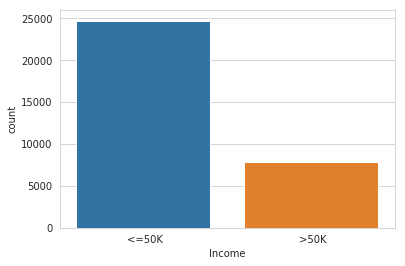

In [61]:
sns.countplot(train['Income'])
plt.show()

Dataset is Imbalenced with Majority class label <=50k.
- **75.91%** data points labeled <=50k
- **24.08%** data points labeled <50k

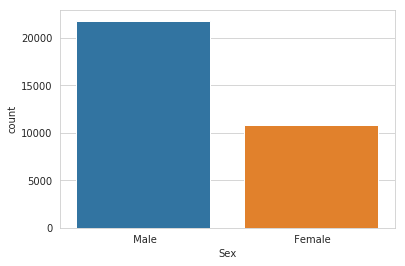

In [62]:
# Gender distribution
sns.countplot(train['Sex'])
plt.show()

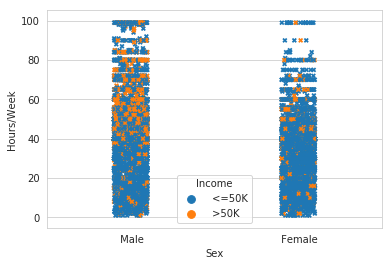

In [54]:
sns.stripplot(x='Sex', y='Hours/Week', data=train,hue='Income',marker='X')

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

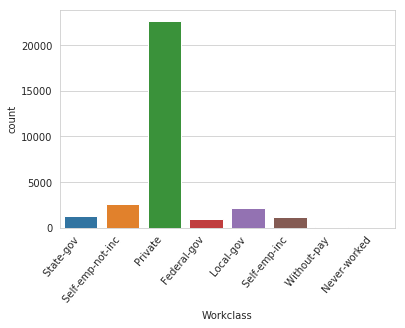

In [73]:
# Workclass
wclass_plot = sns.countplot(train['Workclass'])
wclass_plot.set_xticklabels( wclass_plot.get_xticklabels(),rotation=50, ha="right")

Private class working people are overall High

In [76]:
train['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

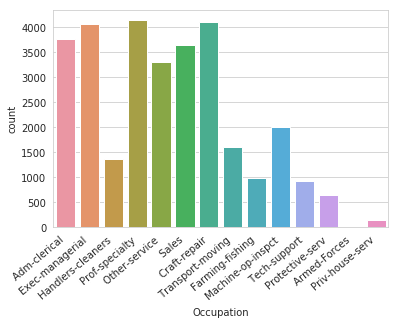

In [82]:
# Occupation
occ_plot = sns.countplot(train['Occupation'])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

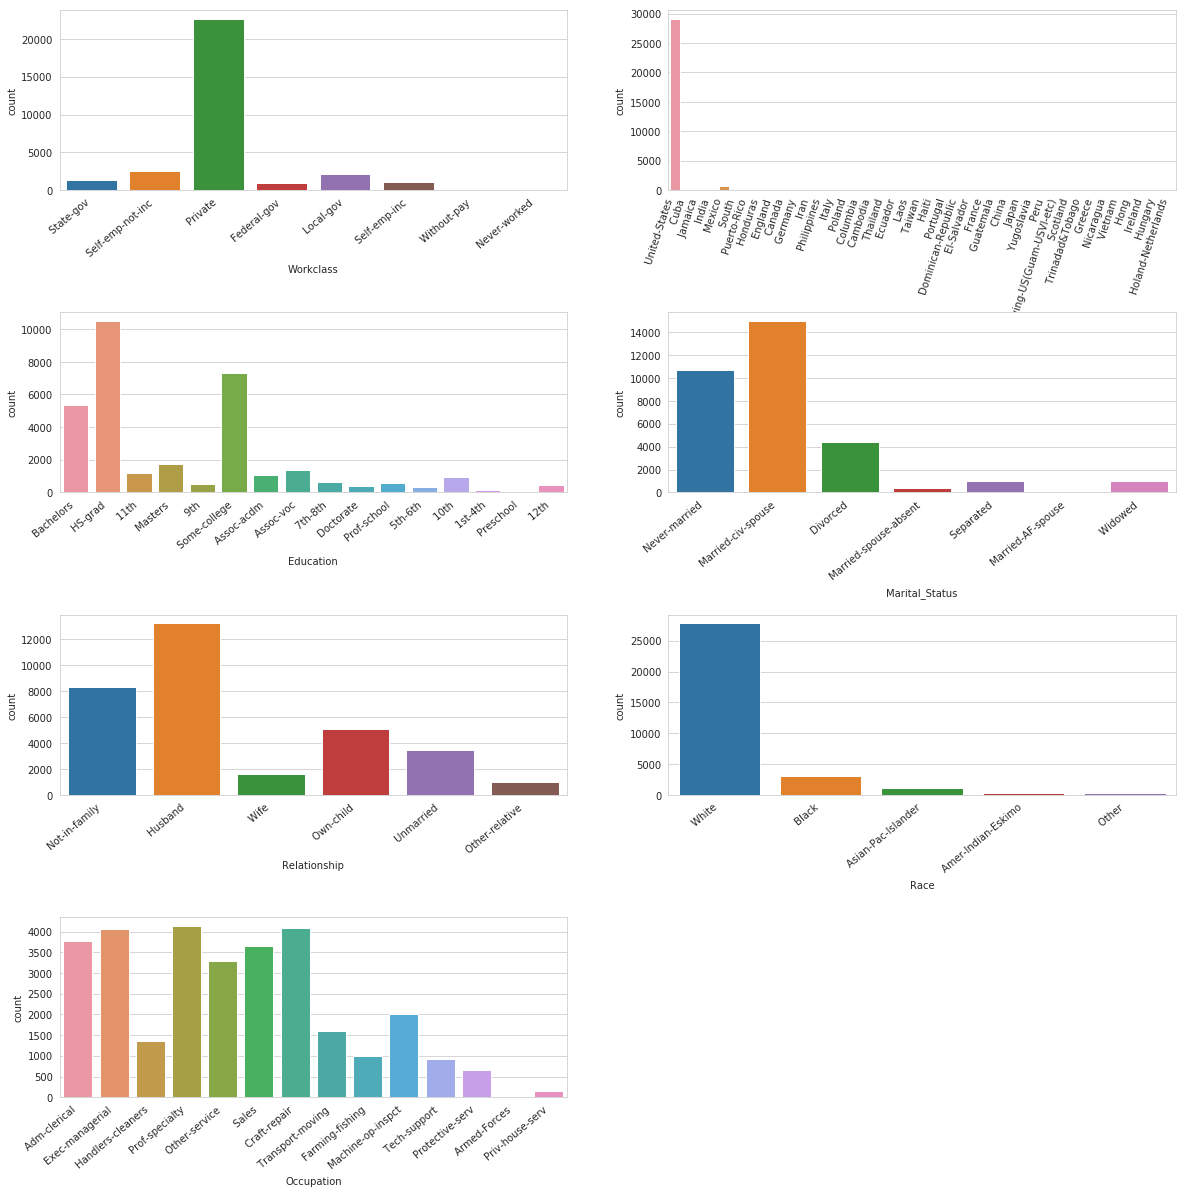

In [84]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(train['Workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(train['Native_country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
ed_plot = sns.countplot(train['Education'], ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(train['Marital_Status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(train['Relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(train['Race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(train['Occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

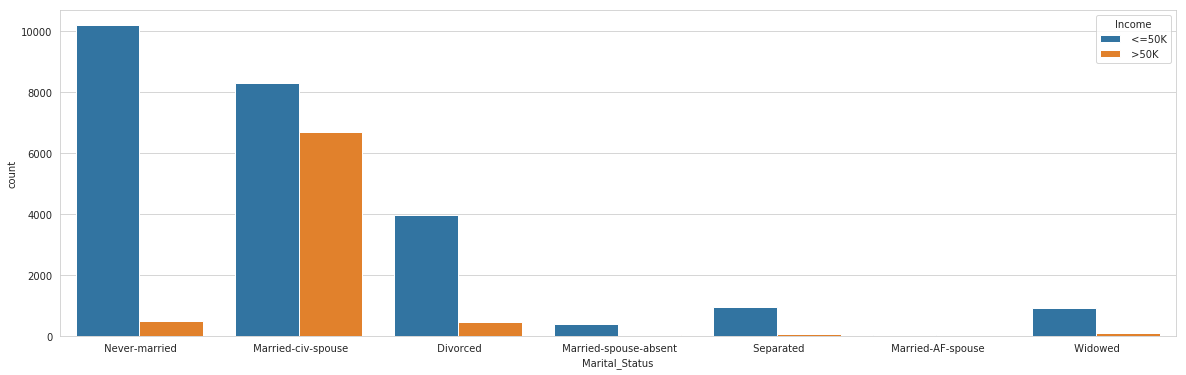

In [87]:
plt.figure(figsize=(20, 6))
sns.countplot(train['Marital_Status'], hue=train['Income'])

Most of the Never Married people are under Income of <=50k

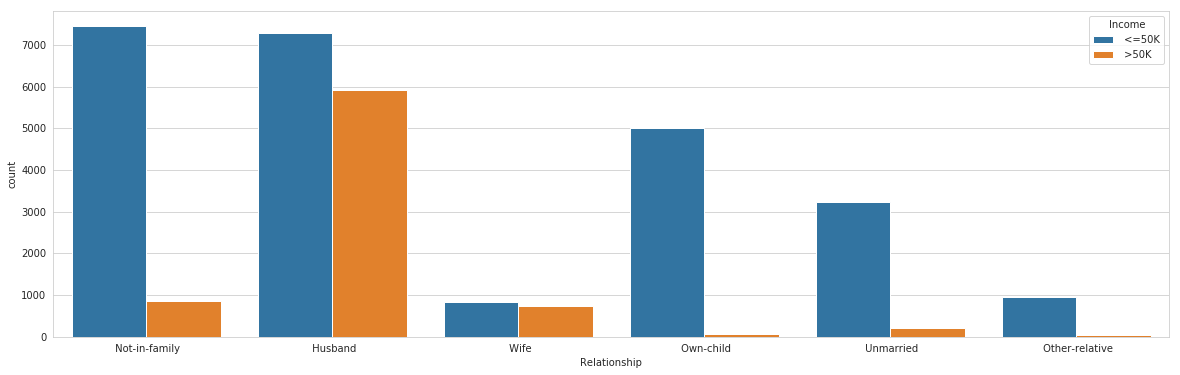

In [103]:
plt.figure(figsize=(20, 6))
sns.countplot(train['Relationship'], hue=train['Income'])

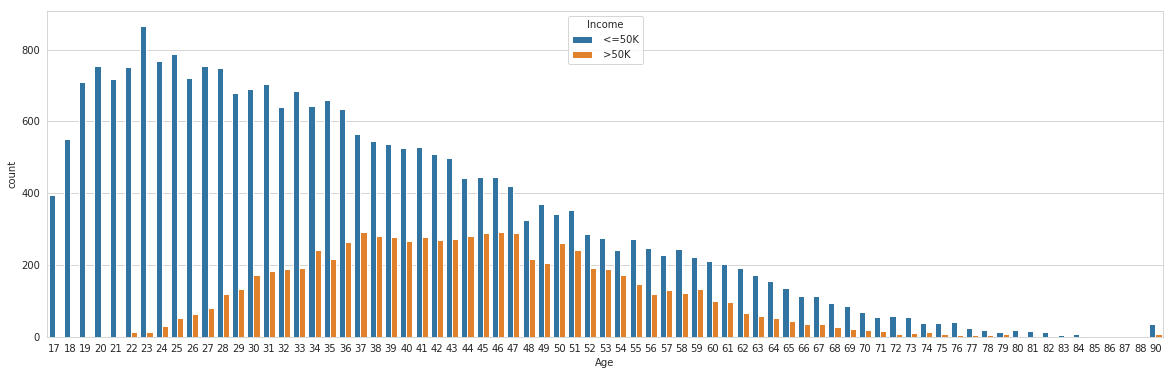

In [104]:
plt.figure(figsize=(20, 6))
sns.countplot(train['Age'], hue=train['Income'])

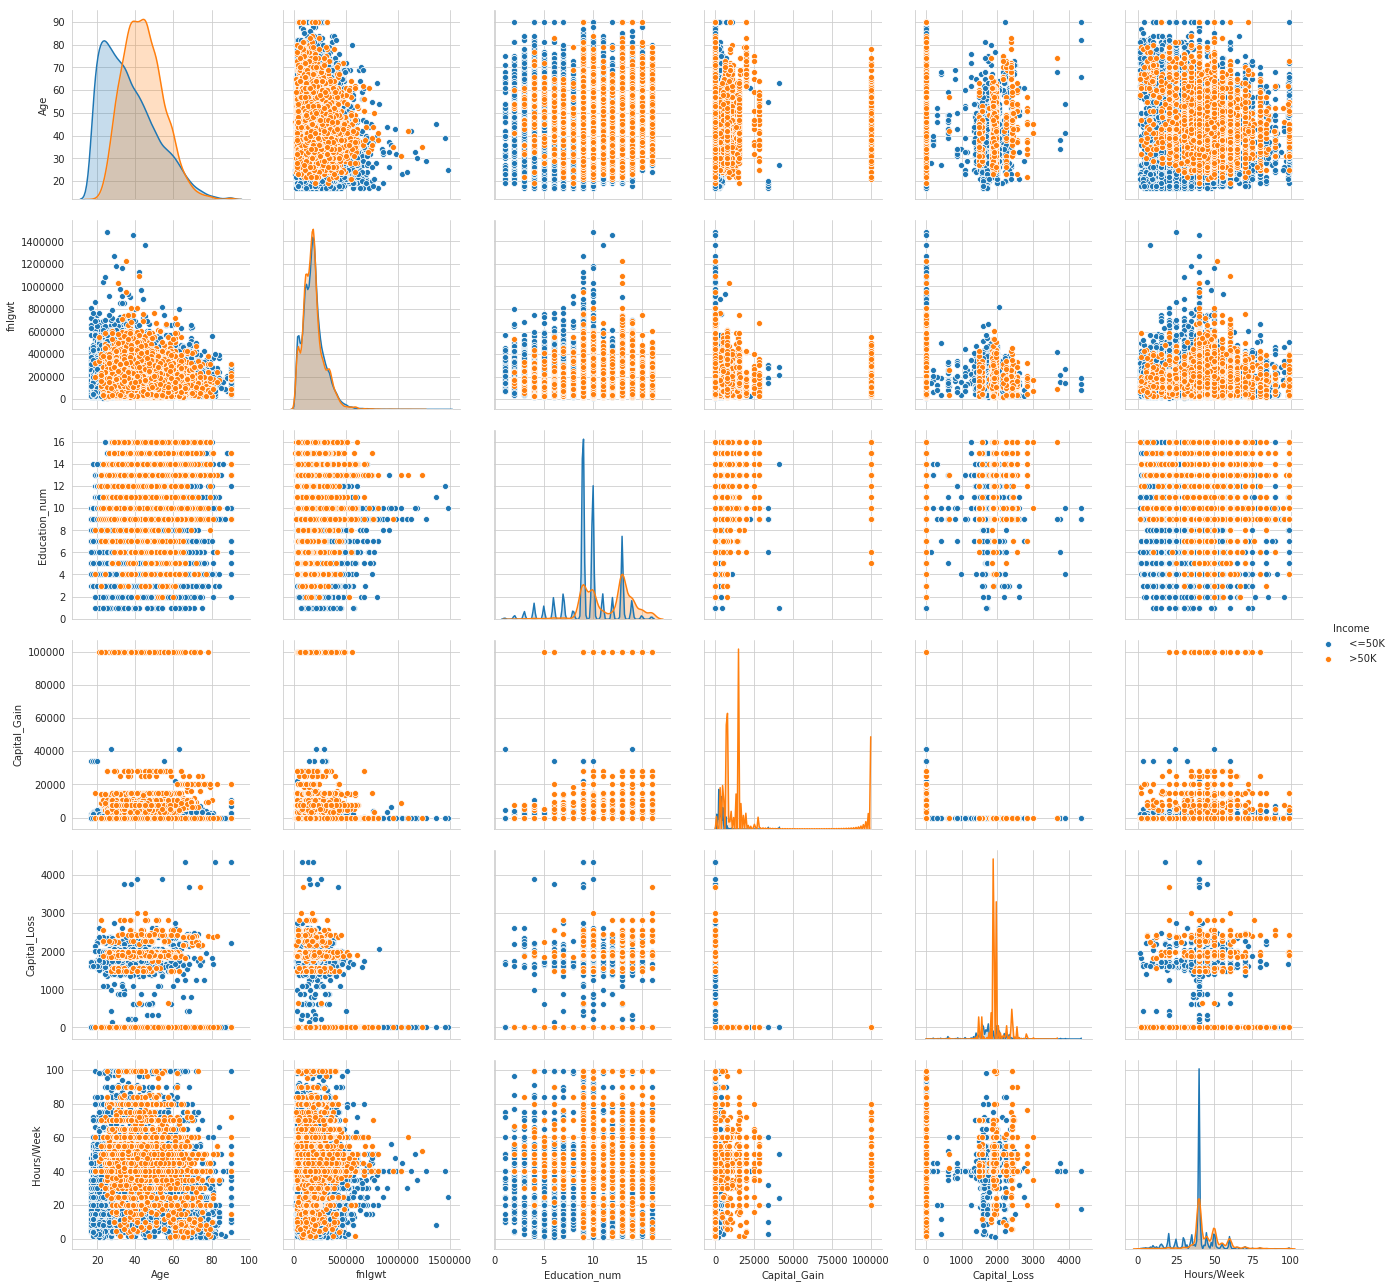

In [107]:
sns.set_style("whitegrid")
sns.pairplot(train, hue="Income", size=3)
plt.show()

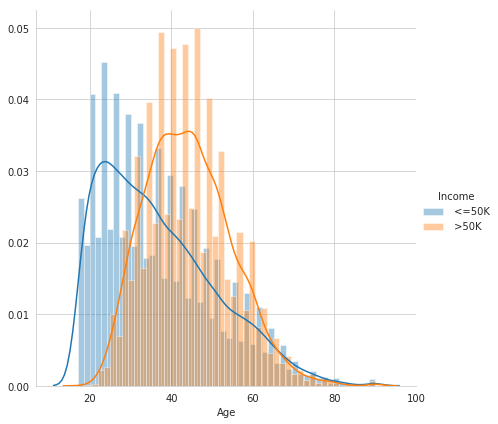

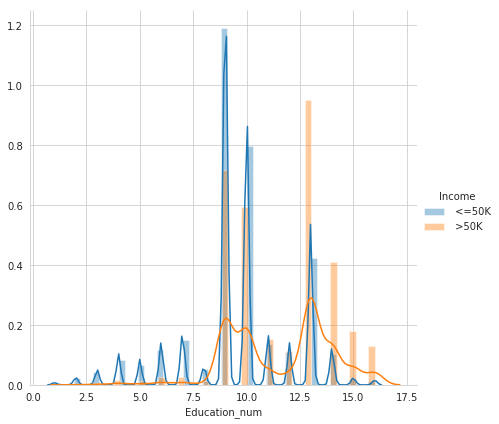

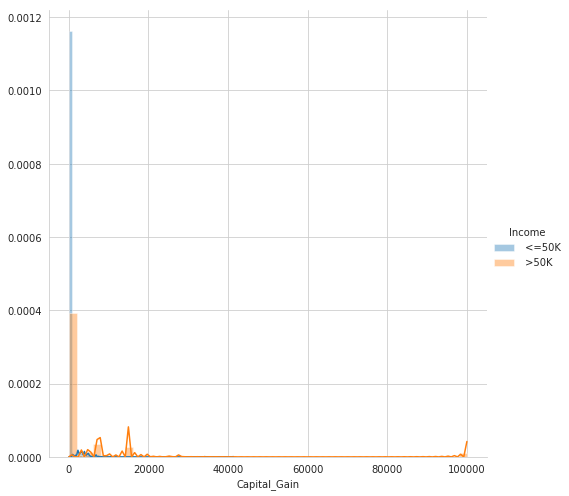

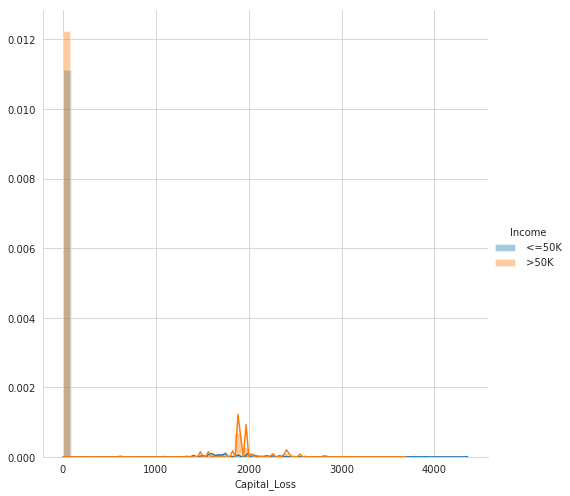

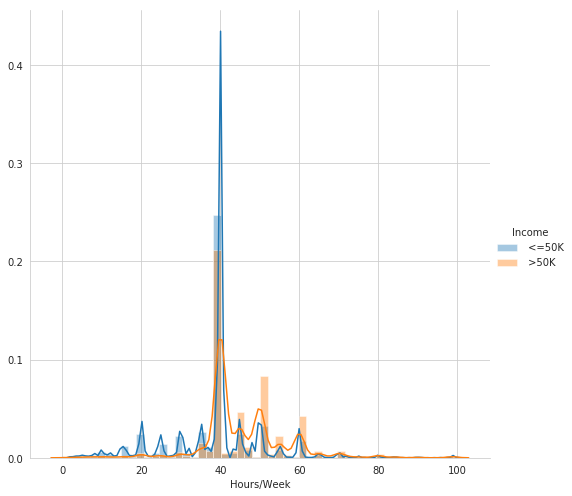

In [132]:
# Age with Income
sns.FacetGrid(train, hue="Income", size=6) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

# Education_num with Education_num
sns.FacetGrid(train, hue="Income", size=6) \
   .map(sns.distplot, "Education_num") \
   .add_legend();
plt.show();

# Education_num with Capital_Gain
sns.FacetGrid(train, hue="Income", size=7) \
   .map(sns.distplot, "Capital_Gain") \
   .add_legend();
plt.show();

# Education_num with Capital_Loss
sns.FacetGrid(train, hue="Income", size=7) \
   .map(sns.distplot, "Capital_Loss") \
   .add_legend();
plt.show();

# Education_num with Hours/Week
sns.FacetGrid(train, hue="Income", size=7) \
   .map(sns.distplot, "Hours/Week") \
   .add_legend();
plt.show();


## Univariate Analysis Report

Dataset is Imbalenced with Majority class label <=50k.
- **75.91%** data points labeled <=50k
- **24.08%** data points labeled <50k

#### Missing Data:
Workclass(1836), Occupation(1843), Native_country(583) <br></br>
All belongs to Categorical data

1. **Workclass**
    - Majority: 
        - Private Class, 22696
    - Minority: 
        - Never-worked, 7
        - Without-pay, 14 
        - Federal-gov, 960
2. **Native Country**
    - Majority:
        - United-States, 29170
    - Minority:
        - Holand-Netherlands, 1
        - Scotland, 12
    - Missing Data:
        - ?, 583
3. **Education**
    - Majority:
        - HS-grad, 10501
        - Some-college, 7291
        - Bachelors, 5355
    - Minority:
        - Preschool, 51
        - 1st-4th, 168
        - 5th-6th, 333
4. **Martial Status**
    - Majority:
        - Married-civ-spouse, 14976
        - Never-married, 10683
        - Divorced, 4443
    - Minority:
        - Married-AF-spouse, 23
        - Married-spouse-absent, 418
5. **Relationship**
    - Majority:
        - Husband, 13193
        - Not-in-family, 8305
    - Minority:
        - Other-relative, 981
        - Wife, 1568
6. **Race**
    - Majority:
        - White, 27816
        - Black, 3124
    - Minority:
        - Other, 271
        - Amer-Indian-Eskimo, 311
7. **Occupation**
    - Majority:
        - Prof-specialty, 4140
        - Craft-repair, 4099
        - Exec-managerial, 4066
    - Minority:
        - Armed-Forces, 9
        - Priv-house-serv, 149
        - Protective-serv, 649
    - Missing Data:
        - ?, 1843

In [193]:
train_df = pd.read_csv("/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-training-copy1.csv",
                      names=columns)
# Repalcing '?' to nan
#train_df.replace(' ?', np.nan, inplace=True)

## Bivariate Analysis 

### Income
changing Income into 0's and 1's

In [194]:
train_df['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)

### Workclass
Replaceing NaNs with 0s

In [145]:
train_df['Workclass'].fillna(' 0', inplace=True)

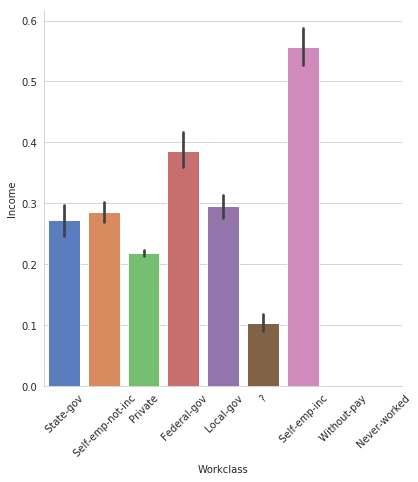

In [146]:
sns.factorplot(x="Workclass", y="Income", data=train_df, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

### Education

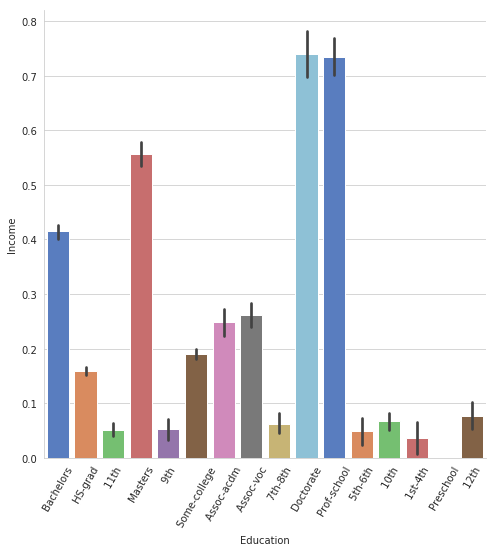

In [147]:
sns.factorplot(x="Education",y="Income",data=train_df,kind="bar", size = 7, 
palette = "muted")
plt.xticks(rotation=60);

All the Grade Education can be combined in to **Primary as a single feature** <br></br>
ref: https://www.kaggle.com/kost13/us-income-logistic-regression/comments

In [248]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [249]:
train_df['Education'] = train_df['Education'].apply(primary)

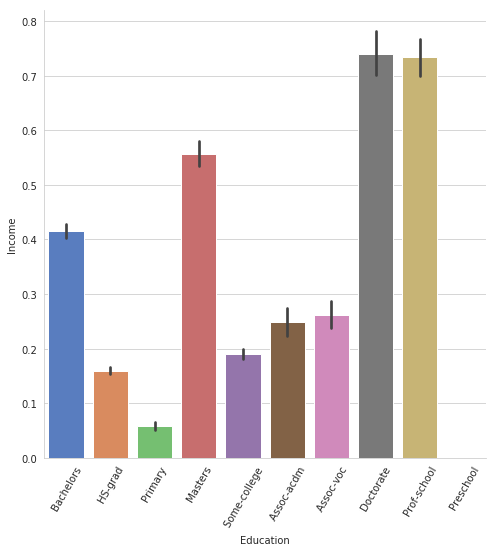

In [250]:
sns.factorplot(x="Education", y="Income", data=train_df, kind="bar", size=7,
              palette="muted")
plt.xticks(rotation=60);

Combinded [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th'] to single feature **Primary**
- Doctorates and Prof-school people has Hihger Income >50k

### Education num

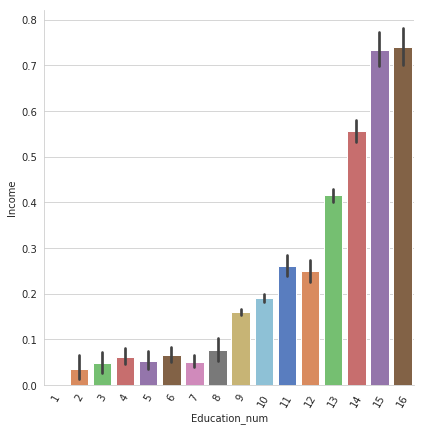

In [159]:
sns.factorplot(x="Education_num",y="Income",data=train_df,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

Relation Higher the `Education_num` give better `Income`

### Martial Status

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64


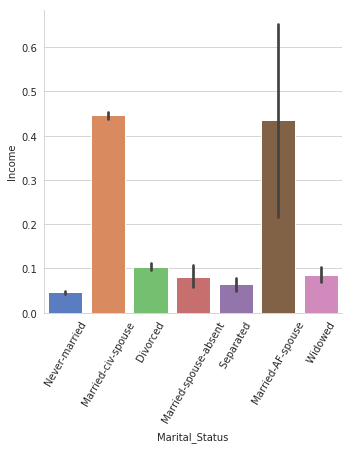

In [195]:
sns.factorplot(x="Marital_Status",y="Income",data=train_df,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

print(train_df['Marital_Status'].value_counts())

### Occupation

In [197]:
#filing NaNs in Occupation with 0
train_df['Occupation'].replace(' ?', ' 0', inplace=True)

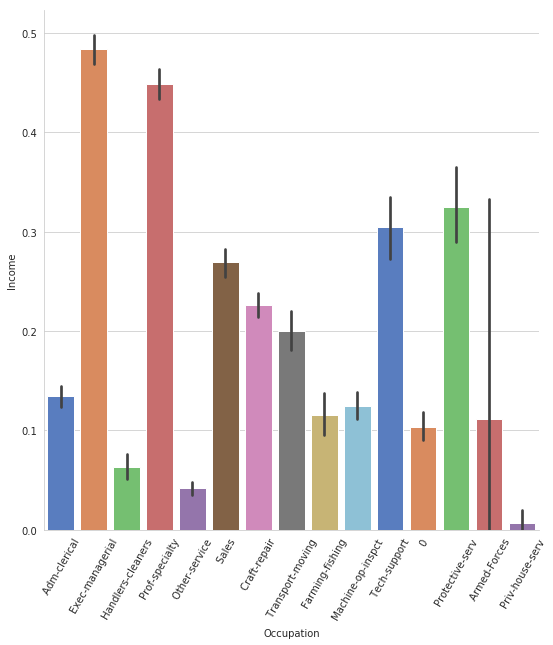

In [198]:
sns.factorplot(x="Occupation",y="Income",data=train_df,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

### Relationship

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


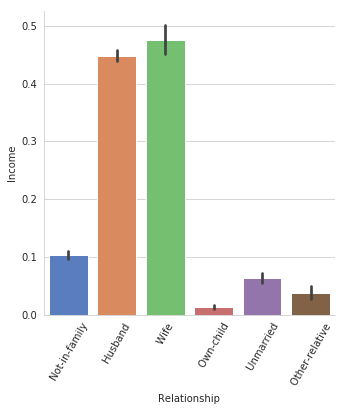

In [206]:
sns.factorplot(x="Relationship", y="Income", data=train_df, size=5, kind="bar",
palette="muted")
plt.xticks(rotation=60)

print(train_df['Relationship'].value_counts())

### Race

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


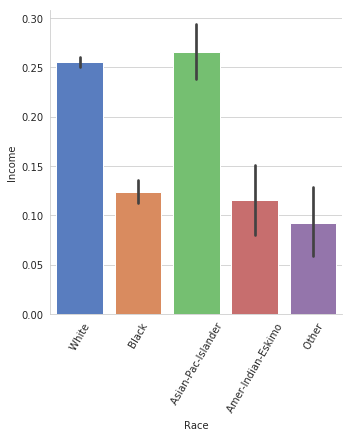

In [214]:
sns.factorplot(x="Race", y="Income", data=train_df, size=5, kind="bar",
palette="muted")
plt.xticks(rotation=60)

print(train_df['Race'].value_counts())

### sex

 Male      21790
 Female    10771
Name: Sex, dtype: int64


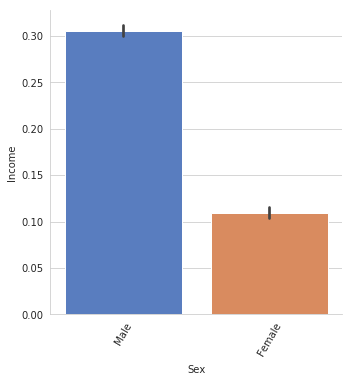

In [216]:
sns.factorplot(x="Sex", y="Income", data=train_df,size=5,kind="bar",
palette="muted")
plt.xticks(rotation=60)

print(train_df['Sex'].value_counts())

### Native country
There Exist 583 Unknown values replacing with 0

In [222]:
train_df['Native_country'].replace(' ?', ' 0', inplace=True)

 United-States                 29170
 Mexico                          643
 0                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

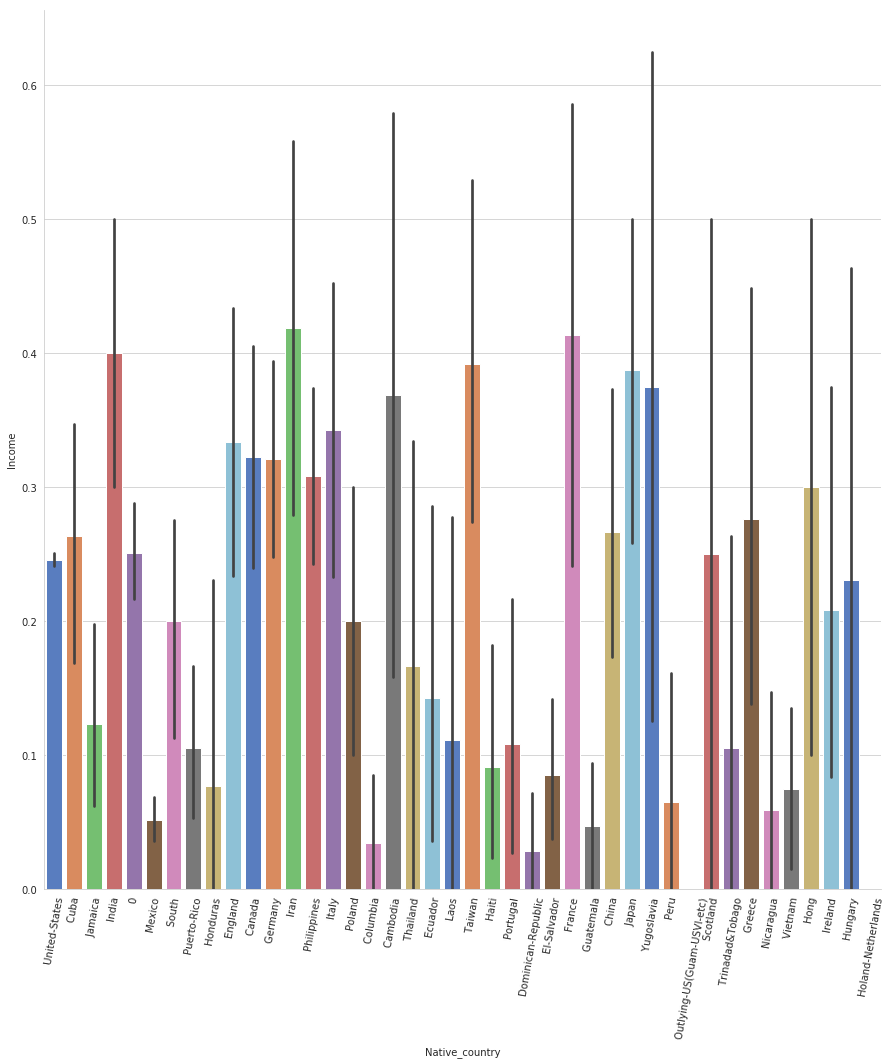

In [228]:
sns.factorplot(x="Native_country", y="Income", data=train_df,size=13,kind="bar",
palette="muted")
plt.xticks(rotation=80)

print(train_df['Native_country'].value_counts())

In [217]:
train_df.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education_num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours/Week', 'Native_country',
       'Income'],
      dtype='object')

In [225]:
train_df['Native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 0                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

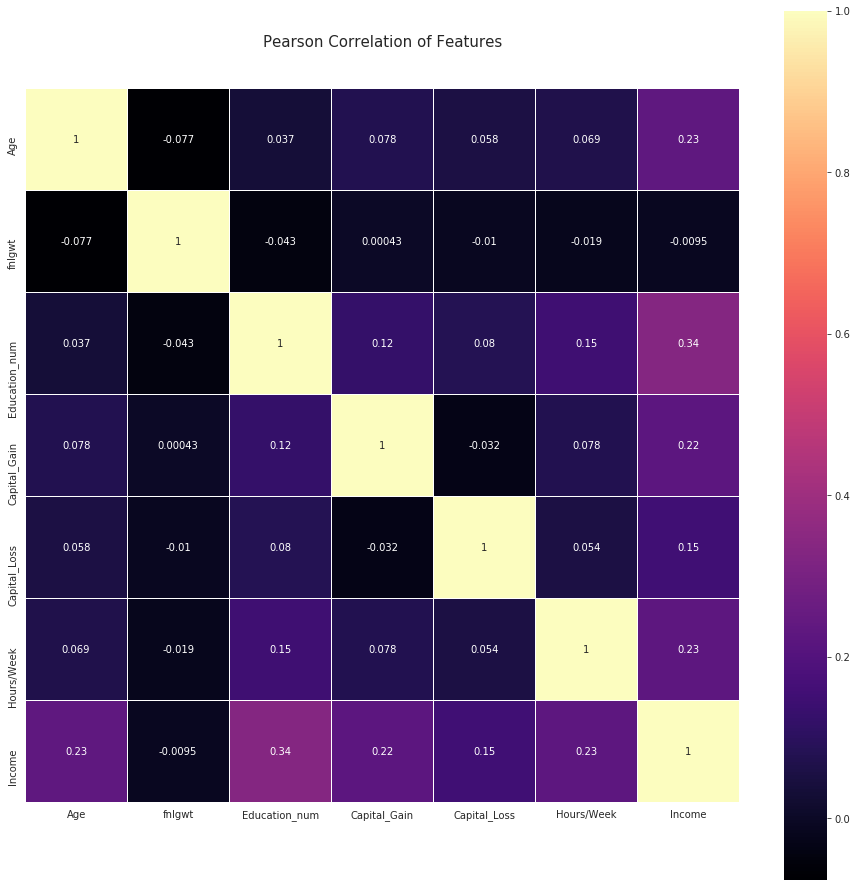

In [229]:
colormap = plt.cm.magma
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Mulitvariate Analysis, pivoting

In [282]:
train_mult_index = train_df.set_index(keys = ['Income','Education','Native_country']).sort_index()

In [283]:
train_mult_index.tail()

Age          Workclass  fnlgwt  \
Income Education     Native_country                                   
1       Some-college  United-States   30   Self-emp-not-inc  176185   
                      United-States   53            Private  304504   
                      United-States   46            Private   42251   
                      United-States   46            Private  364548   
                      Yugoslavia      36       Self-emp-inc  337778   

                                     Education_num          Marital_Status  \
Income Education     Native_country                                          
1       Some-college  United-States             10   Married-spouse-absent   
                      United-States             10      Married-civ-spouse   
                      United-States             10      Married-civ-spouse   
                      United-States             10      Married-civ-spouse   
                      Yugoslavia                10      Married-civ-spouse   

                                            Occupation Relationship    Race  \
Income Education     Native_country                                           
1       Some-college  United-States       Craft-repair    Own-child   White   
                      United-States   Transport-moving      Husband   White   
                      United-States              Sales      Husband   White   
                      United-States    Exec-managerial      Husband   White   
                      Yugoslavia       Exec-managerial      Husband   White   

                                       Sex  Capital_Gain  Capital_Loss  \
Income Education     Native_country                                      
1       Some-college  United-States   Male             0             0   
                      United-States   Male             0          1887   
                      United-States   Male             0             0   
                      United-States   Male             0             0   
                      Yugoslavia      Male             0             0   

                                     Hours/Week  
Income Education     Native_country              
1       Some-college  United-States          60  
                      United-States          45  
                      United-States          45  
                      United-States          48  
                      Yugoslavia             60

In [302]:
train_mult_index.loc[(1, " Primary", " United-States"),].count()[0]

202

#### # People having Income *>50K* with *Primary* Education in *United-Sates*: **202**

In [312]:
train_mult_index.stack().to_frame()

0
Income Education     Native_country                                    
0       Assoc-acdm    0             Age                              42
                                    Workclass          Self-emp-not-inc
                                    fnlgwt                       183765
                                    Education_num                    12
                                    Marital_Status   Married-civ-spouse
                                    Occupation                    Sales
                                    Relationship                Husband
                                    Race                          White
                                    Sex                            Male
                                    Capital_Gain                      0
                                    Capital_Loss                      0
                                    Hours/Week                       40
                                    Age                              33
                                    Workclass                   Private
                                    fnlgwt                       164707
                                    Education_num                    12
                                    Marital_Status        Never-married
                                    Occupation          Exec-managerial
                                    Relationship              Unmarried
                                    Race                          White
                                    Sex                          Female
                                    Capital_Gain                   2174
                                    Capital_Loss                      0
                                    Hours/Week                       55
                                    Age                              22
                                    Workclass                   Private
                                    fnlgwt                       433669
                                    Education_num                    12
                                    Marital_Status        Never-married
                                    Occupation        Handlers-cleaners
...                                                                 ...
1       Some-college  United-States Relationship                Husband
                                    Race                          White
                                    Sex                            Male
                                    Capital_Gain                      0
                                    Capital_Loss                      0
                                    Hours/Week                       45
                                    Age                              46
                                    Workclass                   Private
                                    fnlgwt                       364548
                                    Education_num                    10
                                    Marital_Status   Married-civ-spouse
                                    Occupation          Exec-managerial
                                    Relationship                Husband
                                    Race                          White
                                    Sex                            Male
                                    Capital_Gain                      0
                                    Capital_Loss                      0
                                    Hours/Week                       48
                      Yugoslavia    Age                              36
                                    Workclass              Self-emp-inc
                                    fnlgwt                       337778
                                    Education_num                    10
                                    Marital_Status   Married-civ-spouse
                                    Oc

In [318]:
train_df

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,Primary,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [359]:
iec_data = train_df.loc[:,("Income", "Education", "Workclass")]

In [360]:
iec_data

,Income,Education,Workclass
0,0,Bachelors,State-gov
1,0,Bachelors,Self-emp-not-inc
2,0,HS-grad,Private
3,0,Primary,Private
4,0,Bachelors,Private
5,0,Masters,Private
6,0,Primary,Private
7,1,HS-grad,Self-emp-not-inc
8,1,Masters,Private
9,1,Bachelors,Private


In [358]:
iec_data.pivot_table(values='Income', index='Education', aggfunc='count', margins_name='Income')

,Income
Education,
Assoc-acdm,1067
Assoc-voc,1382
Bachelors,5355
Doctorate,413
HS-grad,10501
Masters,1723
Preschool,51
Primary,4202
Prof-school,576


In [375]:
iec_data[iec_data.Income == 1].pivot_table(values='Income', index='Education', aggfunc='count', margins_name='Income')


,Income
Education,
Assoc-acdm,265
Assoc-voc,361
Bachelors,2221
Doctorate,306
HS-grad,1675
Masters,959
Primary,244
Prof-school,423
Some-college,1387


In [373]:
train_df[train_df.Income == 1].pivot_table(values='Income', index=['Native_country', 'Education'], aggfunc='count')

Income
Native_country   Education            
 0                Assoc-acdm         3
                  Assoc-voc          4
                  Bachelors         52
                  Doctorate         15
                  HS-grad           13
                  Masters           23
                  Primary           10
                  Prof-school        9
                  Some-college      17
 Cambodia         Bachelors          2
                  HS-grad            2
                  Primary            1
                  Some-college       2
 Canada           Assoc-acdm         1
                  Assoc-voc          3
                  Bachelors          9
                  Doctorate          4
                  HS-grad            8
                  Masters            3
                  Primary            1
                  Prof-school        1
                  Some-college       9
 China            Bachelors          8
                  Doctorate          5
                  HS-grad            3
                  Masters            4
 Columbia         Doctorate          1
                  Prof-school        1
 Cuba             Bachelors          4
                  Doctorate          1
...                                ...
 South            Prof-school        1
                  Some-college       3
 Taiwan           Bachelors          3
                  Doctorate          7
                  HS-grad            1
                  Masters            6
                  Prof-school        3
 Thailand         Assoc-acdm         1
                  Doctorate          1
                  Some-college       1
 Trinadad&Tobago  HS-grad            1
                  Primary            1
 United-States    Assoc-acdm       247
                  Assoc-voc        336
                  Bachelors       2016
                  Doctorate        249
                  HS-grad         1583
                  Masters          866
                  Primary          202
                  Prof-school      374
                  Some-college    1298
 Vietnam          Bachelors          1
                  Doctorate          1
                  HS-grad            1
                  Primary            2
 Yugoslavia       Assoc-acdm         1
                  Bachelors          2
                  HS-grad            1
                  Primary            1
                  Some-college       1

[191 rows x 1 columns]

In [379]:
train_df[train_df.Income == 1 and (train_df.Sex == 'Male')].pivot_table(values='Income', index='Education',columns='Workclass', aggfunc='count')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [397]:
gen_in_df = train_df.where(train_df.Income == 1).pivot_table(values=['Income', 'Sex'], index='Education',columns='Workclass', aggfunc='count')

In [399]:
gen_in_df

Income                                                 \
Workclass          ?  Federal-gov  Local-gov  Private  Self-emp-inc   
Education                                                             
 Assoc-acdm        6           19         28      170            18   
 Assoc-voc        13           15         25      256            19   
 Bachelors        45           95        162     1495           171   
 Doctorate        11           15         17      132            29   
 HS-grad          46           73         90     1119           119   
 Masters          18           47        173      534            57   
 Primary           9            2         10      163            15   
 Prof-school       8           23         19      171            78   
 Some-college     35           82         93      923           116   

                                           Sex                          \
Workclass      Self-emp-not-inc  State-gov   ?  Federal-gov  Local-gov   
Education                                                                
 Assoc-acdm                  18          6   6           19         28   
 Assoc-voc                   21         12  13           15         25   
 Bachelors                  163         90  45           95        162   
 Doctorate                   31         71  11           15         17   
 HS-grad                    179         49  46           73         90   
 Masters                     59         71  18           47        173   
 Primary                     40          5   9            2         10   
 Prof-school                106         18   8           23         19   
 Some-college               107         31  35           82         93   

                                                                   
Workclass      Private  Self-emp-inc  Self-emp-not-inc  State-gov  
Education                                                          
 Assoc-acdm        170            18                18          6  
 Assoc-voc         256            19                21         12  
 Bachelors        1495           171               163         90  
 Doctorate         132            29                31         71  
 HS-grad          1119           119               179         49  
 Masters           534            57                59         71  
 Primary           163            15                40          5  
 Prof-school       171            78               106         18  
 Some-college      923           116               107         31

In [386]:
train_df.Sex.value_counts()

 Male      21790
 Female    10771
Name: Sex, dtype: int64

In [402]:
gen_in_df.index.names

FrozenList(['Education'])

In [408]:
gen_in_df.loc[:,'Sex']

Workclass,?,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
Education,,,,,,,
Assoc-acdm,6,19,28,170,18,18,6
Assoc-voc,13,15,25,256,19,21,12
Bachelors,45,95,162,1495,171,163,90
Doctorate,11,15,17,132,29,31,71
HS-grad,46,73,90,1119,119,179,49
Masters,18,47,173,534,57,59,71
Primary,9,2,10,163,15,40,5
Prof-school,8,23,19,171,78,106,18
Some-college,35,82,93,923,116,107,31


In [ ]:
gen_in_df.query()